**Informasi Mahasiswa**
Nama: Fachri Rozan

NPM : 2108107010017

**Jenis Dataset**

Dataset Prediksi mobil dari kaggle https://www.kaggle.com/datasets/danielkyrka/bmw-pricing-challenge
Adapun Atributnya adalah:
- maker_key
- model_key
- mileage
- engine_power
- registration_date
- fuel
- paint_color
- car_type
- feature_1
- feature_2
- feature_3

**Studi Kasus**
Pada Kasus ini melihat bagaimana cara melihat hubungan harga mobil dengan spesifikasinya menggunakan SVR

**IMPORT LIBRARY**

In [3]:
# Load libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

**Baca data**

In [4]:
data = pd.read_csv("bmw.csv")
data.head()

,maker_key,model_key,mileage,engine_power,registration_date,fuel,paint_color,car_type,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,price,sold_at
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


**Preprocessing Data**

In [5]:
# Misalkan Anda memiliki DataFrame 'df' dan kolom 'ObesityCategory'
unique_values = data['fuel'].unique()
print(unique_values)

['diesel' 'petrol' 'hybrid_petrol' 'electro']


In [6]:
# Encode the outcome column such that 1 means diabetes and 0 means no diabetes
label_encoder = LabelEncoder()
data['fuel'] = label_encoder.fit_transform(data['fuel'])
print(data['fuel'])

0       0
1       3
2       0
3       0
4       0
       ..
4838    0
4839    0
4840    0
4841    0
4842    0
Name: fuel, Length: 4843, dtype: int64


In [7]:
selected_columns = ['price', 'mileage', 'engine_power']
data_selected = data[selected_columns]
data_selected.head()

,price,mileage,engine_power
0,11300,140411,100
1,69700,13929,317
2,10200,183297,120
3,25100,128035,135
4,33400,97097,160


In [8]:
# Menghitung jumlah nilai NaN dalam setiap kolom
nan_counts = data_selected.isna().sum()

# Menampilkan jumlah nilai NaN dalam setiap kolom
print(nan_counts)


price           0
mileage         0
engine_power    0
dtype: int64


**Membangun Model dan Visualisasinya**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Root Mean Squared Error (RMSE) Polynomial: 0.7154030320522825


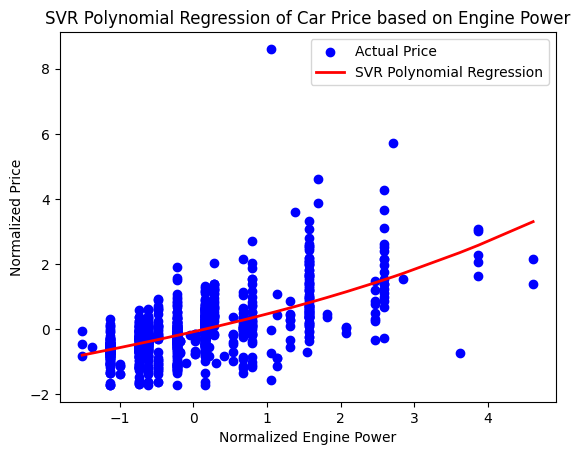

In [9]:
# Pisahkan atribut (fitur) dan target
X = data_selected['engine_power'].values.reshape(-1, 1)  # Atribut: Cylinders
y = data_selected['price'].values  # Target: Price

sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(np.reshape(X, (-1,1)))
y = sc_Y.fit_transform(np.reshape(y, (-1,1)))
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Transformasi fitur menjadi fitur polinomial
poly_features = PolynomialFeatures(degree=3)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Buat dan latih model SVR pada fitur polinomial
model_poly = SVR(kernel='linear')
model_poly.fit(X_poly_train, y_train)

# Prediksi harga menggunakan data pengujian
y_pred_poly = model_poly.predict(X_poly_test)

# Evaluasi model polinomial menggunakan Root Mean Squared Error (RMSE)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
print("Root Mean Squared Error (RMSE) Polynomial:", rmse_poly)

# Plot data as scatter plot
plt.scatter(X_test, y_test, color='blue', label='Actual Price')

# Sort the test data and predictions by X_test values for smoother line plot
sorted_indices = np.argsort(X_test.ravel())
X_test_sorted = X_test[sorted_indices]
y_pred_sorted_poly = y_pred_poly[sorted_indices]

# Plot SVR polynomial predictions as line plot
plt.plot(X_test_sorted, y_pred_sorted_poly, color='red', linewidth=2, label='SVR Polynomial Regression')

plt.title('SVR Polynomial Regression of Car Price based on Engine Power')
plt.xlabel('Normalized Engine Power')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Root Mean Squared Error (RMSE) Polynomial: 0.8439685619772759


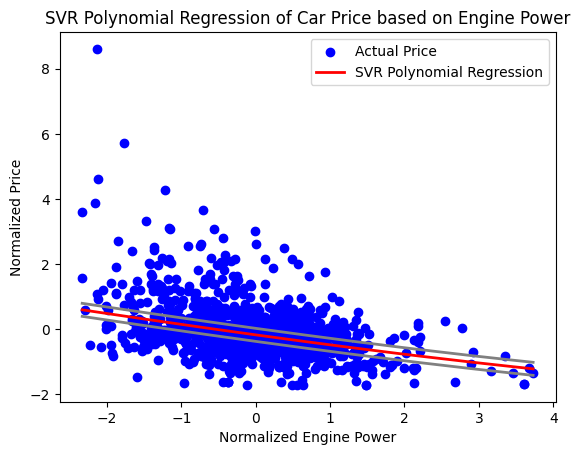

In [10]:
# Pisahkan atribut (fitur) dan target
X = data_selected['mileage'].values.reshape(-1, 1)  # Atribut: Cylinders
y = data_selected['price'].values  # Target: Price


sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(np.reshape(X, (-1,1)))
y = sc_Y.fit_transform(np.reshape(y, (-1,1)))
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Transformasi fitur menjadi fitur polinomial
poly_features = PolynomialFeatures(degree=3)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Buat dan latih model SVR pada fitur polinomial
model_poly = SVR(kernel='linear')
model_poly.fit(X_poly_train, y_train)

# Prediksi harga menggunakan data pengujian
y_pred_poly = model_poly.predict(X_poly_test)

# Evaluasi model polinomial menggunakan Root Mean Squared Error (RMSE)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
print("Root Mean Squared Error (RMSE) Polynomial:", rmse_poly)

# Plot data as scatter plot
plt.scatter(X_test, y_test, color='blue', label='Actual Price')

# Sort the test data and predictions by X_test values for smoother line plot
sorted_indices = np.argsort(X_test.ravel())
X_test_sorted = X_test[sorted_indices]
y_pred_sorted_poly = y_pred_poly[sorted_indices]

# Plot SVR polynomial predictions as line plot
plt.plot(X_test_sorted, y_pred_sorted_poly, color='red', linewidth=2, label='SVR Polynomial Regression')
plt.plot(X_test_sorted, y_pred_sorted_poly-0.2, color='gray', linewidth=2,)
plt.plot(X_test_sorted, y_pred_sorted_poly+0.2, color='gray', linewidth=2,)
plt.title('SVR Polynomial Regression of Car Price based on Engine Power')
plt.xlabel('Normalized Engine Power')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Root Mean Squared Error (RMSE) Polynomial: 0.8439685619772759


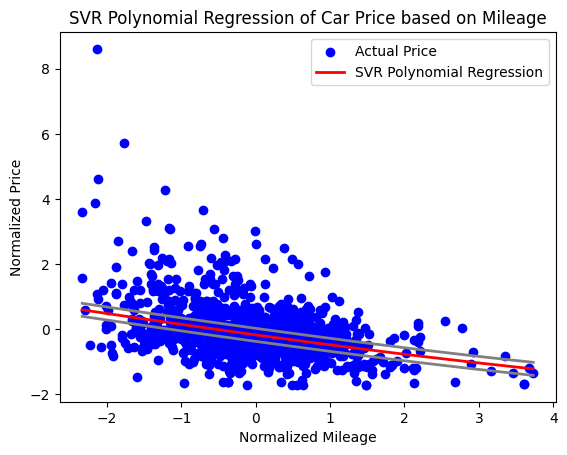

In [11]:
scaler = StandardScaler()

# Pisahkan atribut (fitur) dan target
x_mileage = data_selected['mileage'].values.reshape(-1, 1)
y = data_selected['price'].values.reshape(-1, 1)  # Target: Price
x_scaled = scaler.fit_transform(x_mileage)
y_scaled = scaler.fit_transform(y)
x_mileage_train, x_mileage_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)


# Transformasi fitur menjadi fitur polinomial
poly_features = PolynomialFeatures(degree=3)
x_mileage_poly_train = poly_features.fit_transform(x_mileage_train)
x_mileage_poly_test = poly_features.transform(x_mileage_test)

# Buat dan latih model SVR pada fitur polinomial
model_poly = SVR(kernel='linear')
model_poly.fit(x_mileage_poly_train, y_train)

# Prediksi harga menggunakan data pengujian
y_pred_poly = model_poly.predict(x_mileage_poly_test)

# Evaluasi model polinomial menggunakan Root Mean Squared Error (RMSE)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
print("Root Mean Squared Error (RMSE) Polynomial:", rmse_poly)

# Plot data as scatter plot
plt.scatter(x_mileage_test, y_test, color='blue', label='Actual Price')

# Sort the test data and predictions by x_mileage_test values for smoother line plot
sorted_indices = np.argsort(x_mileage_test.ravel())
x_mileage_test_sorted = x_mileage_test[sorted_indices]
y_pred_sorted_poly = y_pred_poly[sorted_indices]

# Plot SVR polynomial predictions as line plot
plt.plot(x_mileage_test_sorted, y_pred_sorted_poly, color='red', linewidth=2, label='SVR Polynomial Regression')
plt.plot(x_mileage_test_sorted, y_pred_sorted_poly-0.2, color='gray', linewidth=2,)
plt.plot(x_mileage_test_sorted, y_pred_sorted_poly+0.2, color='gray', linewidth=2,)
plt.title('SVR Polynomial Regression of Car Price based on Mileage')
plt.xlabel('Normalized Mileage')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()


ANN dengan melihat hubungan antara mileage dan price

<ipython-input-17-56c55044cd7a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['mileage_scaled'] = scaler.fit_transform(data_selected['mileage'].values.reshape(-1, 1))


31/31 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE) ANN: 7680.162968872658


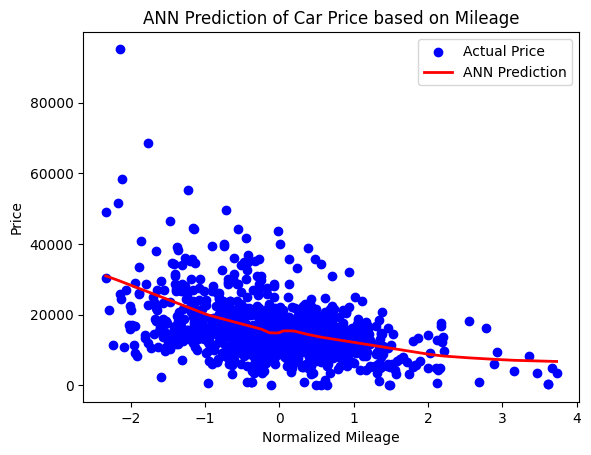

In [17]:
# Pisahkan atribut (fitur) dan target
x_mileage = data_selected['mileage'].values.reshape(-1, 1)
y = data_selected['price'].values.reshape(-1, 1)  # Target: Price

# Penskalaan fitur dan target
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_mileage)
y_scaled = scaler.fit_transform(y)

# Bagi data menjadi set pelatihan dan pengujian
x_mileage_train, x_mileage_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

# Buat dan latih model ANN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model.fit(x_mileage_train, y_train, epochs=100, verbose=0)  # Epochs diset ke 100

# Prediksi harga menggunakan data pengujian
y_pred_ann = model.predict(x_mileage_test)

# Transformasi kembali skala prediksi dan target ke skala asli
y_pred_ann = scaler.inverse_transform(y_pred_ann)
y_test = scaler.inverse_transform(y_test)

# Evaluasi model menggunakan Root Mean Squared Error (RMSE)
rmse_ann = mean_squared_error(y_test, y_pred_ann, squared=False)
print("Root Mean Squared Error (RMSE) ANN:", rmse_ann)

# Plot data as scatter plot
plt.scatter(x_mileage_test, y_test, color='blue', label='Actual Price')

# Sort the test data and predictions by x_mileage_test values for smoother line plot
sorted_indices = np.argsort(x_mileage_test.ravel())
x_mileage_test_sorted = x_mileage_test[sorted_indices]
y_pred_sorted_ann = y_pred_ann[sorted_indices]

# Plot ANN predictions as line plot
plt.plot(x_mileage_test_sorted, y_pred_sorted_ann, color='red', linewidth=2, label='ANN Prediction')
plt.title('ANN Prediction of Car Price based on Mileage')
plt.xlabel('Normalized Mileage')
plt.ylabel('Price')
plt.legend()
plt.show()


ANN melihat hubungan antara engine_power dengan price

31/31 [==============================] - 0s 1ms/step
Root Mean Squared Error (RMSE) ANN: 7649.869641718357


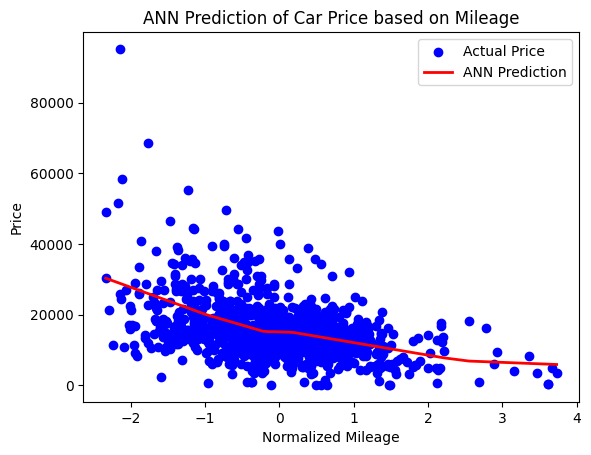

In [19]:


# Pisahkan atribut (fitur) dan target
X = data_selected['engine_power'].values.reshape(-1, 1)  # Atribut: Cylinders
y = data_selected['price'].values.reshape(-1, 1)  # Target: Price

# Penskalaan fitur dan target
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_mileage)
y_scaled = scaler.fit_transform(y)

# Bagi data menjadi set pelatihan dan pengujian
x_mileage_train, x_mileage_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=42)

# Buat dan latih model ANN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
model.fit(x_mileage_train, y_train, epochs=100, verbose=0)  # Epochs diset ke 100

# Prediksi harga menggunakan data pengujian
y_pred_ann = model.predict(x_mileage_test)

# Transformasi kembali skala prediksi dan target ke skala asli
y_pred_ann = scaler.inverse_transform(y_pred_ann)
y_test = scaler.inverse_transform(y_test)

# Evaluasi model menggunakan Root Mean Squared Error (RMSE)
rmse_ann = mean_squared_error(y_test, y_pred_ann, squared=False)
print("Root Mean Squared Error (RMSE) ANN:", rmse_ann)

# Plot data as scatter plot
plt.scatter(x_mileage_test, y_test, color='blue', label='Actual Price')

# Sort the test data and predictions by x_mileage_test values for smoother line plot
sorted_indices = np.argsort(x_mileage_test.ravel())
x_mileage_test_sorted = x_mileage_test[sorted_indices]
y_pred_sorted_ann = y_pred_ann[sorted_indices]

# Plot ANN predictions as line plot
plt.plot(x_mileage_test_sorted, y_pred_sorted_ann, color='red', linewidth=2, label='ANN Prediction')
plt.title('ANN Prediction of Car Price based on Mileage')
plt.xlabel('Normalized Mileage')
plt.ylabel('Price')
plt.legend()
plt.show()
